In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Equação Logística com $\rho=4.00$ e $A_0=0.0001$</center>

* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.1.b"

rho = 4.00

A = zeros(size)
A[0] = 0.0001

for i in range(0, size-1):
    A[i+1] = rho*A[i]*(1-A[i])
    
savetxt(name + ".txt", A)

save_A = A

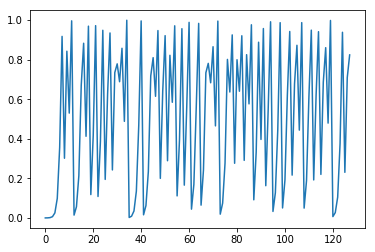

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [4]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.50337804739
var  :  0.124136207879
skew :  -0.0176098581162
kurt :  -1.49632517826
Q1   :  0.151266836474
Q3   :  0.854218928748


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

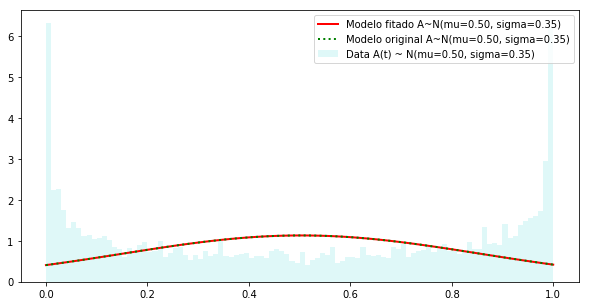

In [5]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

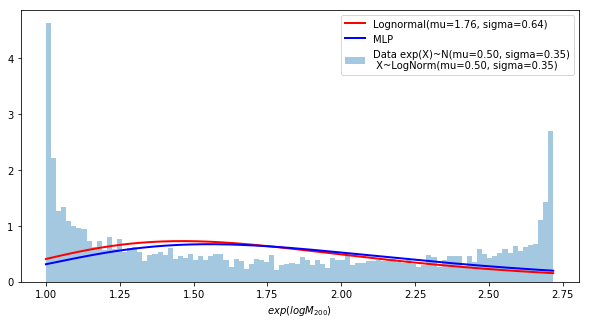

In [6]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.02245750779438966, -15.170544981196269, 15.669430642098931)
        Fitado			 Original
mean :  0.5028375167836323 	 0.50337804739
var  :  0.1239247648490273 	 0.124136207879
skew :  0.06739234943154261 	 -0.017609858116157458
kurt :  0.008075287783896101 	 -1.496325178258426


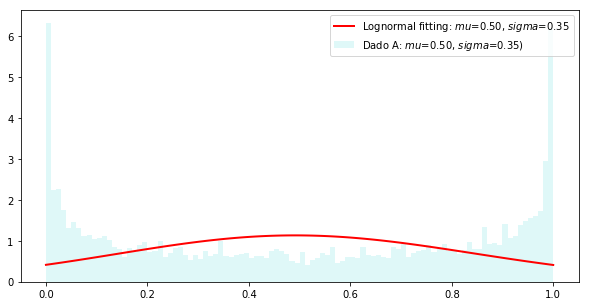

In [7]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  2.495392e-07   max:  0.9999999 
median:  0.5031523 
mean:  0.503378 
estimated sd:  0.3523727 
estimated skewness:  -0.01761631 
estimated kurtosis:  1.503313 



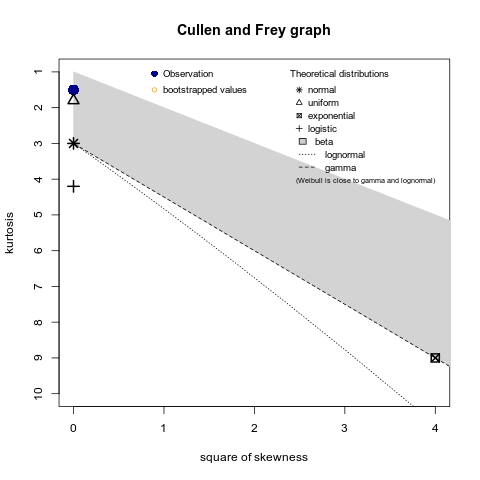

In [8]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.51611959935247509, 0.51567555527281628, -9.9750460756089341e-05, 1.0001996880759412)
        Fitado			 Original
mean :  0.5002153168935751 	 0.50337804739
var  :  0.12309302299318188 	 0.124136207879
skew :  -0.0008093432279352365 	 -0.017609858116157458
kurt :  -1.4881701056196341 	 -1.496325178258426


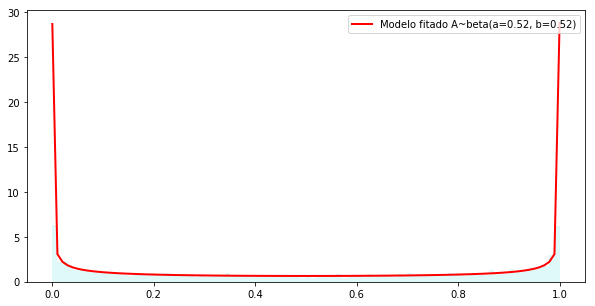

In [9]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

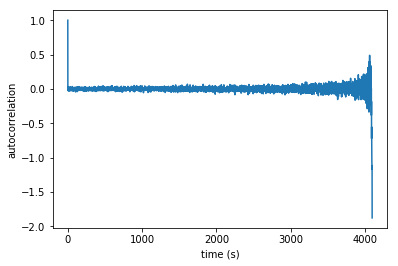

In [10]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [  1.00000000e-04   3.99960000e-04   1.59920013e-03   6.38657075e-03
   2.53831298e-02   9.89553063e-02   3.56652615e-01   9.17806108e-01
   3.01752223e-01   8.42791276e-01]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


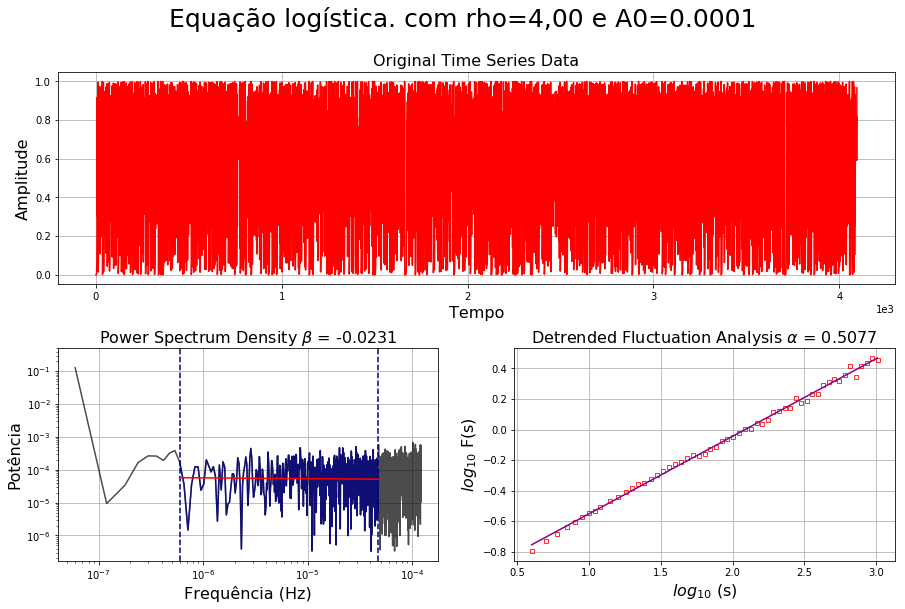

In [11]:
aux.plot_psd_dfa(A, 'Equação logística. com rho=4,00 e A0=0.0001')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [12]:
A = save_A[1024:]
name = "A.ex:1.1.b"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [13]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.50393379815
var  :  0.1239955322
skew :  -0.0230936095474
kurt :  -1.49549055889
Q1   :  0.153616020599
Q3   :  0.854086850455


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

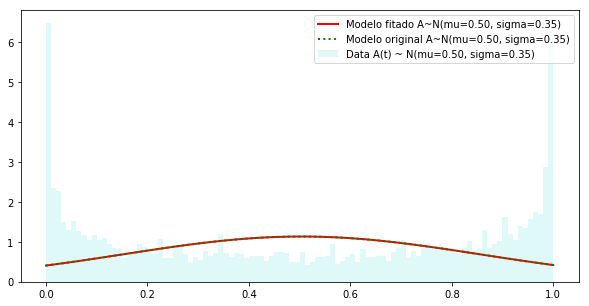

In [14]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

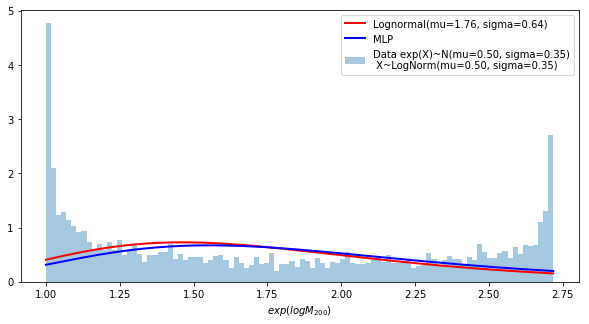

In [15]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.024836027422982222, -13.674989102840154, 14.175417798586405)
        Fitado			 Original
mean :  0.5048012691279595 	 0.50393379815
var  :  0.12406172966349534 	 0.1239955322
skew :  0.07453490007092164 	 -0.02309360954742383
kurt :  0.009878008660902715 	 -1.4954905588860032


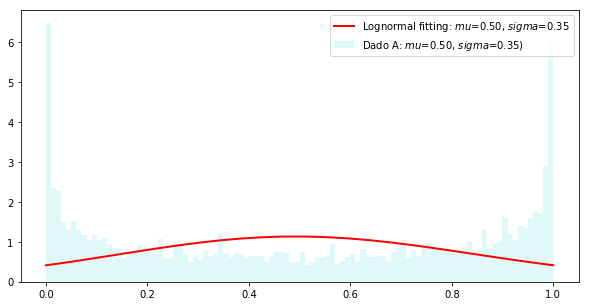

In [16]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  2.495392e-07   max:  0.9999999 
median:  0.5035671 
mean:  0.5039338 
estimated sd:  0.3521873 
estimated skewness:  -0.02310489 
estimated kurtosis:  1.504028 



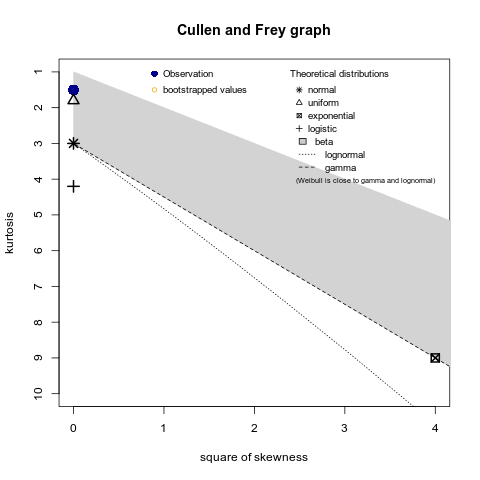

In [17]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.51209709972559758, 0.51410905975138699, -9.9750460756089341e-05, 1.0001996880759412)
        Fitado			 Original
mean :  0.49901960745771895 	 0.50393379815
var  :  0.12343210560485554 	 0.1239955322
skew :  0.003688831871092711 	 -0.02309360954742383
kurt :  -1.490221313509967 	 -1.4954905588860032


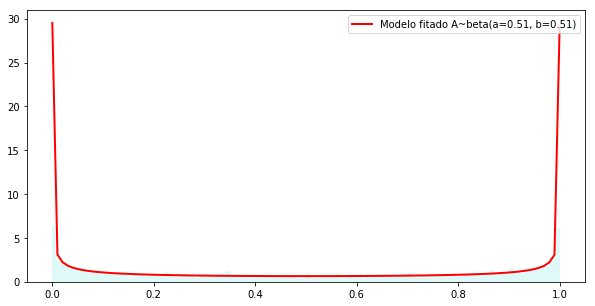

In [18]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

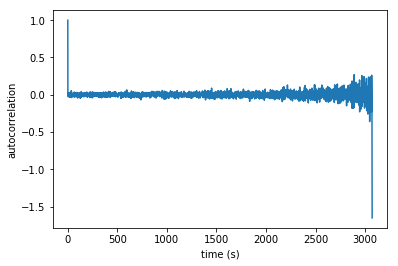

In [19]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [ 0.06090836  0.22879414  0.70578953  0.83060267  0.56280749  0.98422088
  0.06212056  0.23304639  0.71494308  0.81519789]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


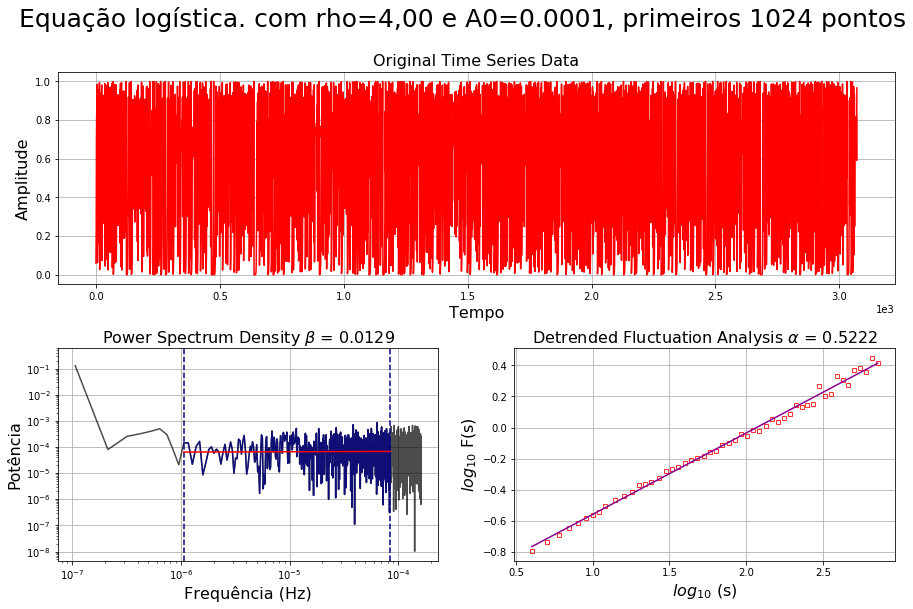

In [20]:
aux.plot_psd_dfa(A, 'Equação logística. com rho=4,00 e A0=0.0001, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [21]:
A = save_A[3*1024:4096]
name = "A.ex:1.1.b"
savetxt(name + ".txt", A)

In [22]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [23]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.498983216203
var  :  0.125402696507
skew :  -0.00747069161779
kurt :  -1.50142291038
Q1   :  0.14436569542
Q3   :  0.852382016861


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

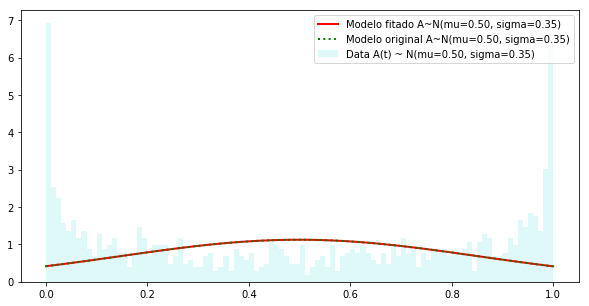

In [24]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

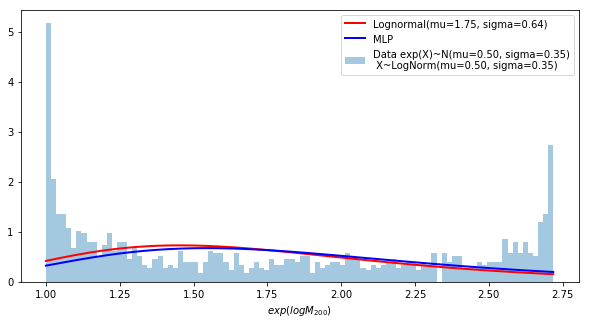

In [25]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.025987961429524864, -13.126470171988537, 13.621201885532102)
        Fitado			 Original
mean :  0.4993321940108135 	 0.498983216203
var  :  0.12543399712733683 	 0.125402696507
skew :  0.07799461032899589 	 -0.007470691617790162
kurt :  0.010816484518203495 	 -1.50142291037557


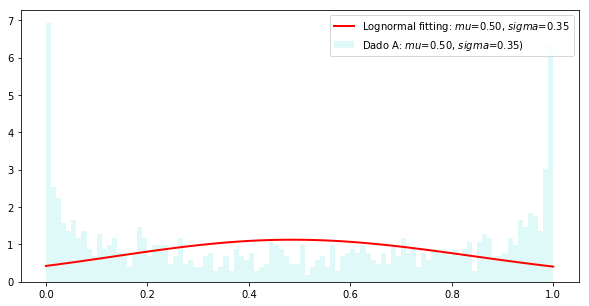

In [26]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  4.170881e-07   max:  0.9999999 
median:  0.5012931 
mean:  0.4989832 
estimated sd:  0.3542955 
estimated skewness:  -0.007481656 
estimated kurtosis:  1.497102 



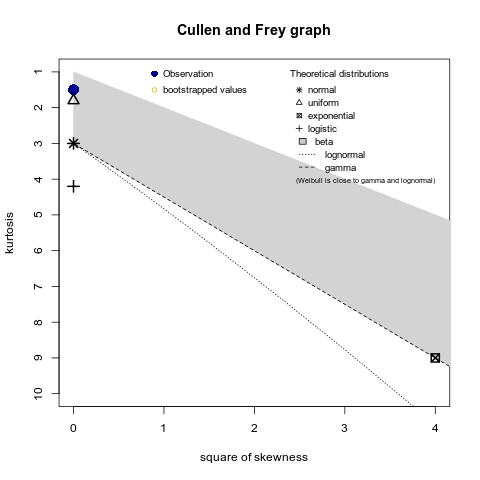

In [27]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.49303639436780966, 0.5049264784867592, -9.9582911899468219e-05, 1.0001994786398636)
        Fitado			 Original
mean :  0.49404179049070096 	 0.498983216203
var  :  0.12515960658777517 	 0.125402696507
skew :  0.0224713320512054 	 -0.007470691617790162
kurt :  -1.5001963275568908 	 -1.50142291037557


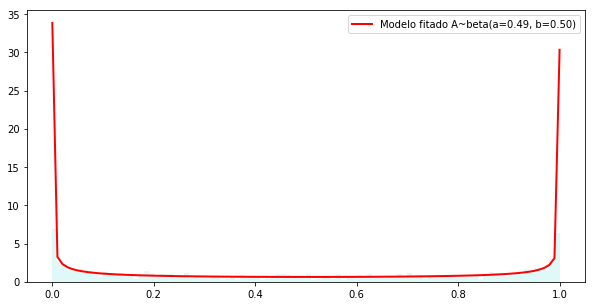

In [28]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

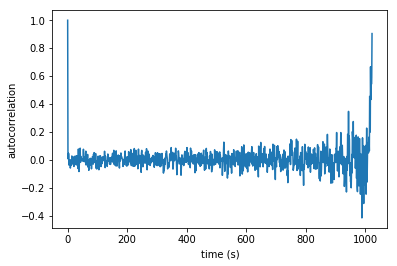

In [29]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [ 0.74151976  0.76667282  0.71554243  0.81416584  0.6051993   0.95573243
  0.16923182  0.56236965  0.98444011  0.06127113]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


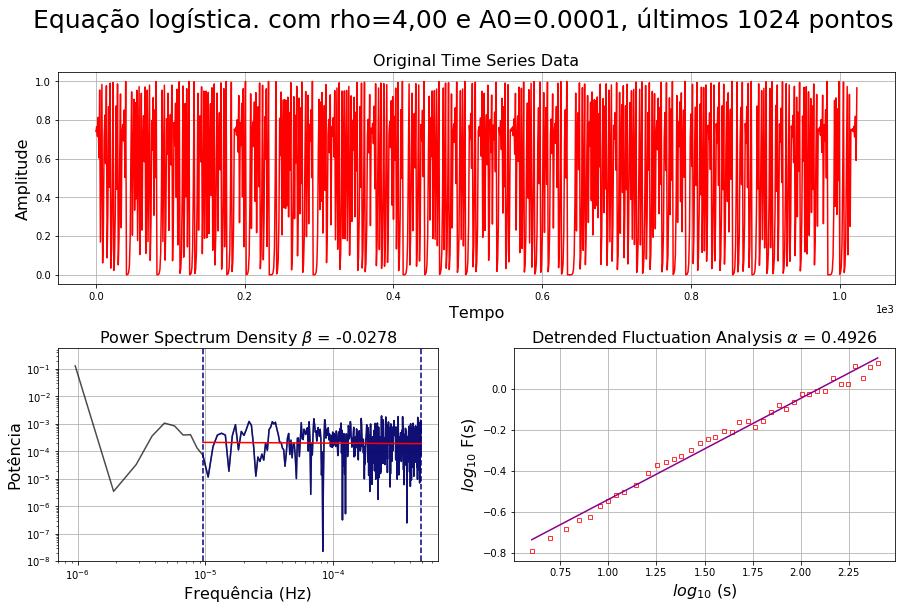

In [30]:
aux.plot_psd_dfa(A, 'Equação logística. com rho=4,00 e A0=0.0001, últimos 1024 pontos')